In [99]:
import numpy as np
from keras.datasets import mnist
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Dropout, MaxPooling2D, UpSampling2D, Flatten, Dense

In [100]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [101]:
print("Formato de treinamento = ",X_train.shape,"+ Label treinamento = ",y_train.shape)
print("Formato de teste = ",X_test.shape,"+ Label treinamento = ",y_test.shape)

Formato de treinamento =  (60000, 28, 28) + Label treinamento =  (60000,)
Formato de teste =  (10000, 28, 28) + Label treinamento =  (10000,)


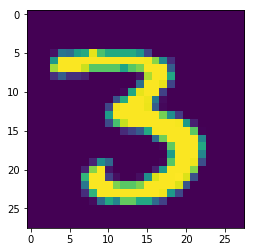

Label =  3


In [102]:
from matplotlib import pyplot as plt
idx = 12
plt.imshow(X_train[idx]);plt.show();
print ("Label = ",y_train[idx] )

### Redimensionando formato da imagem

In [103]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Redimensionando os labels - one hot encoded

In [104]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train_ohe = np_utils.to_categorical(y_train, 10)
Y_test_ohe = np_utils.to_categorical(y_test, 10)

In [105]:
Y_train_ohe.shape

(60000, 10)

In [106]:
print("Label = ",y_train[12], "corresponde agora a:",Y_train_ohe[12])

Label =  3 corresponde agora a: [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


#### Declarando o modelo e sequencia

Shape de entrada --> width , height, channel

In [107]:
input_shape = (X_train[0].shape[0], X_train[0].shape[1], 1)
model = Sequential()
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
__________

In [108]:
### Prepare Data

In [109]:
# Reshape input images to fit TensorFlow shape pattern
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

#### Compile model

In [110]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Compile model

In [111]:
epochs = 10
batch_size = 32
model.fit(X_train, Y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test_ohe))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 104s - loss: 0.2020 - acc: 0.9395 - val_loss: 0.0467 - val_acc: 0.9848
Epoch 2/10
60000/60000 [==============================] - 108s - loss: 0.0856 - acc: 0.9747 - val_loss: 0.0354 - val_acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 110s - loss: 0.0652 - acc: 0.9805 - val_loss: 0.0346 - val_acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 107s - loss: 0.0540 - acc: 0.9833 - val_loss: 0.0348 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 103s - loss: 0.0460 - acc: 0.9860 - val_loss: 0.0322 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 104s - loss: 0.0401 - acc: 0.9872 - val_loss: 0.0278 - val_acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 103s - loss: 0.0361 - acc: 0.9888 - val_loss: 0.0297 - val_acc: 0.9914
Epoch 8/10
60000/60000 [=======================